In [1]:
"""
(Ques1)
Apply data cleaning techniques on any dataset 
(e.g. Chronic Kidney Disease dataset from UCI repository). 
Techniques may include handling missing values, outliers and inconsistent values. 
Also, a set of validation rules may be specified for the particular dataset 
and validation checks performed."""


import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
df = sns.load_dataset("titanic")

# 1. Handling Missing Values
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing values in 'Embarked' with the most common value (mode)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop the 'Cabin' column as it has too many missing values
df.drop(columns=['deck'], inplace=True)

# 2. Handling Outliers
# Handle outliers in 'Fare' using the IQR method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# 3. Dealing with Inconsistent Values
# Standardize categorical data: Ensure 'Sex' is lowercase
df['sex'] = df['sex'].str.lower()

# Check and correct any inconsistencies in 'Embarked'
df['embarked'] = df['embarked'].str.strip().str.upper()
# The valid values for 'embarked' are 'C', 'Q', and 'S'
df = df[df['embarked'].isin(['C', 'Q', 'S'])]

# 4. Applying Validation Rules
#  'Age' is within a reasonable range
invalid_age = df[(df['age'] < 0)]
df = df.drop(invalid_age.index)

# 'Fare' is non-negative
df = df[df['fare'] >= 0]

# Save the cleaned dataset
df.to_csv('titanic-cleaned.csv', index=False)

print("Data cleaning complete. Cleaned dataset saved as 'titanic-cleaned.csv'.")

Data cleaning complete. Cleaned dataset saved as 'titanic-cleaned.csv'.


In [2]:
# (Ques2)
#Apply data pre-processing techniques such as standardization/normalization, 
#transformation, aggregation, discretization/binarization, sampling etc. on any dataset



import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer

import seaborn as sns

df = sns.load_dataset("titanic")

# Dropping rows with missing valuesu
df.dropna(subset=['age', 'fare', 'embarked', 'sex'], inplace=True)

# 1. Standardization
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

# 2. Normalization
normalizer = MinMaxScaler()
df[['age', 'fare']] = normalizer.fit_transform(df[['age', 'fare']])

# 3. Transformation (Logarithmic transformation of 'Fare')
df['fare_log'] = np.log1p(df['fare'])  # Using log1p to handle zero values

# 4. Aggregation
agg_df = df.groupby(['pclass', 'sex'])[['age', 'fare']].mean().reset_index()

# 5. Discretization/Binarization
df['age_bin'] = pd.cut(df['age'], bins=4, labels=['Young', 'Middle-aged', 'Senior', 'Old'])

# Binarize the 'Fare' column: 0 if Fare is below median, else 1
binarizer = Binarizer(threshold=df['fare'].median())
df['fare_bin'] = binarizer.fit_transform(df[['fare']])

# 6. Sampling
# Random Sampling: Select 30% of the data randomly
random_sample = df.sample(frac=0.3, random_state=1)

stratified_sample = pd.concat([df[df['pclass'] == i].sample(frac=0.3, random_state=1) for i in df['pclass'].unique()])
stratified_sample = stratified_sample.reset_index(drop=True)


# Display some of the processed data
print(df.head())
print("Aggregated Data:", agg_df.head())
print("Random Sample Data:", random_sample.head())
print("Stratified Sample Data:", stratified_sample.head())

   survived  pclass     sex       age  sibsp  parch      fare embarked  class  \
0         0       3    male  0.271174      1      0  0.014151        S  Third   
1         1       1  female  0.472229      1      0  0.139136        C  First   
2         1       3  female  0.321438      0      0  0.015469        S  Third   
3         1       1  female  0.434531      1      0  0.103644        S  First   
4         0       3    male  0.434531      0      0  0.015713        S  Third   

     who  adult_male deck  embark_town alive  alone  fare_log      age_bin  \
0    man        True  NaN  Southampton    no  False  0.014052  Middle-aged   
1  woman       False    C    Cherbourg   yes  False  0.130270  Middle-aged   
2  woman       False  NaN  Southampton   yes   True  0.015350  Middle-aged   
3  woman       False    C  Southampton   yes  False  0.098618  Middle-aged   
4    man        True  NaN  Southampton    no   True  0.015590  Middle-aged   

   fare_bin  
0       0.0  
1       1.0  
2 

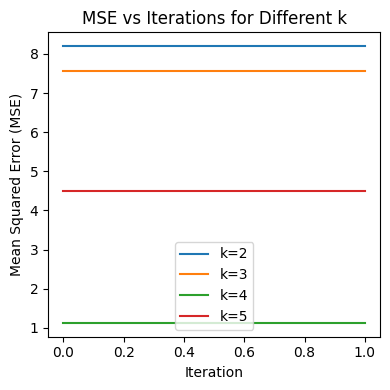

In [3]:
#(Ques3)
# Apply simple K-means algorithm for clustering any dataset. 
#Compare the performance of clusters by varying the algorithm parameters.
#For a given set of parameters, plot a line graph depicting MSE obtained after each iteration.



import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error

# K-means algorithm implementation
def k_means(X, k, max_iters=100):
    n_samples, n_features = X.shape
    # Randomly initialize centroids
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    prev_centroids = centroids.copy()
    mse_list = []
    
    for i in range(max_iters):
        # Step 1: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Step 2: Update centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Step 3: Compute MSE for current iteration
        mse = np.mean(np.min(distances, axis=1)**2)
        mse_list.append(mse)
        
        # If centroids do not change, break early
        if np.all(prev_centroids == new_centroids):
            break
        
        prev_centroids = new_centroids
    
    return labels, centroids, mse_list

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Experiment with different values of k
k_values = [2, 3, 4, 5]
plt.figure(figsize=(4, 4))  # Adjusted figure size

for k in k_values:
    labels, centroids, mse_list = k_means(X, k)
    
    # Plot MSE for each iteration
    plt.plot(mse_list, label=f'k={k}')

plt.title('MSE vs Iterations for Different k')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.tight_layout()  # This ensures everything fits well in the window
plt.show()


Silhouette score for K-means (k=2): 0.5818
Silhouette score for K-means (k=3): 0.4599
Silhouette score for K-means (k=4): 0.3869
Silhouette score for K-means (k=5): 0.3455


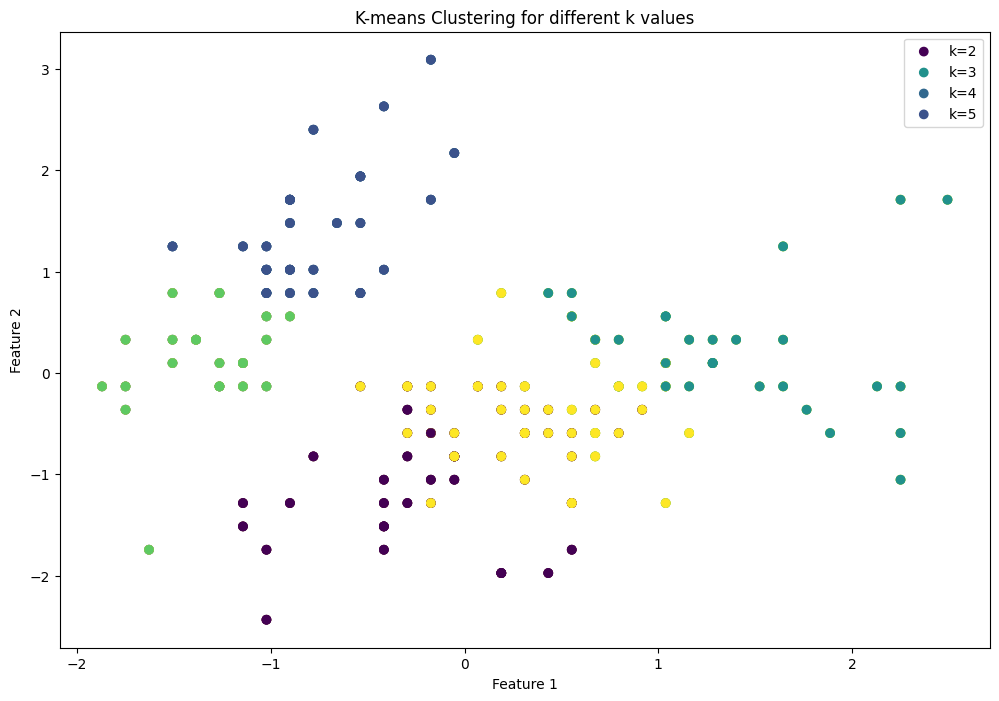

Silhouette score for Agglomerative (n=2): 0.5770
Silhouette score for Agglomerative (n=3): 0.4467
Silhouette score for Agglomerative (n=4): 0.4006
Silhouette score for Agglomerative (n=5): 0.3306


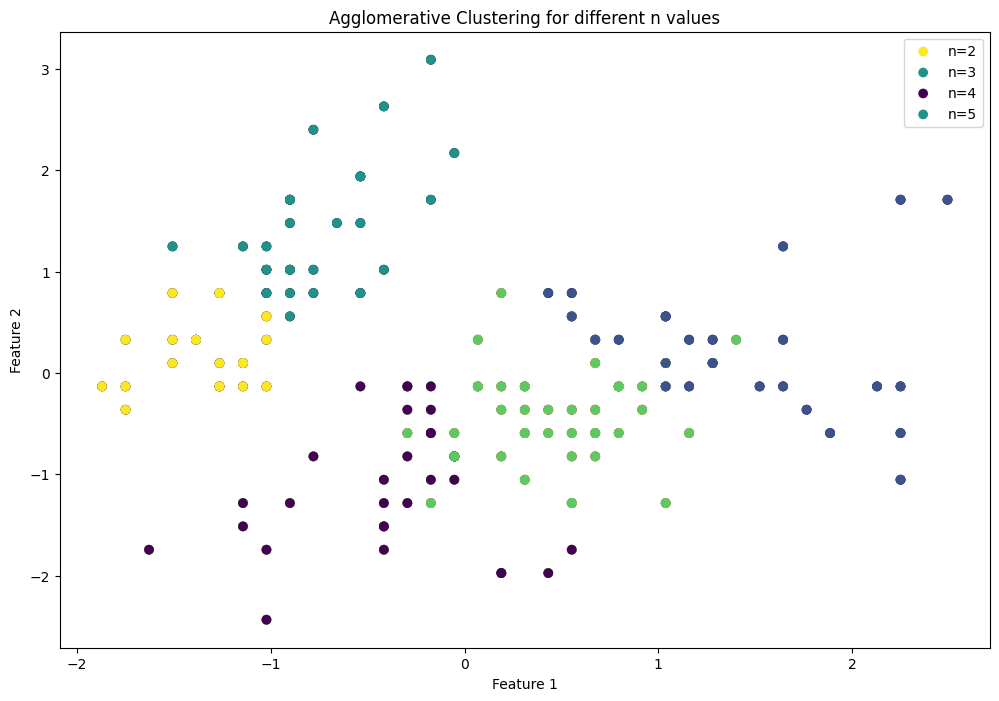

Silhouette score for DBSCAN (eps=0.3): -0.1942
Silhouette score for DBSCAN (eps=0.5): 0.3565
Silhouette score for DBSCAN (eps=0.7): 0.5234
Silhouette score for DBSCAN (eps=1.0): 0.5383


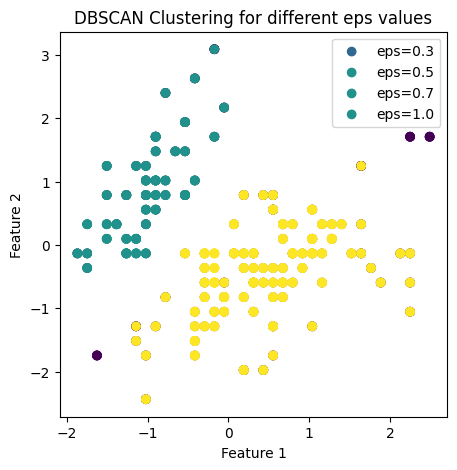

In [4]:
#(Ques4)
#Perform partitioning, hierarchical, and density-based clustering
#algorithms on a downloaded dataset and evaluate the cluster quality
#by changing the algorithm's parameters.



import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate clustering performance using silhouette score
def evaluate_clustering(X, model, name):
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette score for {name}: {score:.4f}")
    return labels

# 1. K-means clustering (partitioning)
k_values = [2, 3, 4, 5]
plt.figure(figsize=(12, 8))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels_kmeans = evaluate_clustering(X_scaled, kmeans, f"K-means (k={k})")
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis', label=f'k={k}')
plt.title("K-means Clustering for different k values")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 2. Agglomerative Clustering (hierarchical)
n_clusters = [2, 3, 4, 5]
plt.figure(figsize=(12, 8))
for n in n_clusters:
    agglom = AgglomerativeClustering(n_clusters=n)
    labels_agglom = evaluate_clustering(X_scaled, agglom, f"Agglomerative (n={n})")
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agglom, cmap='viridis', label=f'n={n}')
plt.title("Agglomerative Clustering for different n values")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 3. DBSCAN (density-based clustering)
eps_values = [0.3, 0.5, 0.7, 1.0]
plt.figure(figsize=(5, 5))
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_dbscan = evaluate_clustering(X_scaled, dbscan, f"DBSCAN (eps={eps})")
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis', label=f'eps={eps}')
plt.title("DBSCAN Clustering for different eps values")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [5]:
# Ques5
"""Use Naive bayes, K-nearest, and Decision tree classification algorithms to build classifiers on any two datasets. Pre-process the datasets using techniques specified in Q2. Compare the Accuracy, Precision, Recall and F1 measure reported for each dataset using the abovementioned classifiers under the following situations:
i.
Using Holdout method (Random sampling):
a) Training set = 80% Test set = 20%
b) Training set = 66.6% (2/3rd of total), Test set = 33.3%
ii.
Using Cross-Validation:
a) 10-fold
b) 5-fold
"""


import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate classifiers (for part 1)
def evaluate_classifier(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
    
    return accuracy, precision, recall, f1

# Function to perform Cross-Validation and calculate the average scores (for part 2)
def cross_validation(X, y, n_splits=10):
    # Define the stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
    
    # Initialize classifiers
    models = {
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier()
    }
    
    # Dictionary to store the results
    results = {}
    
    for model_name, model in models.items():
        accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
        precision_scores = cross_val_score(model, X, y, cv=skf, scoring='precision_macro')
        recall_scores = cross_val_score(model, X, y, cv=skf, scoring='recall_macro')
        f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')
        
        results[model_name] = {
            'accuracy': accuracy_scores.mean(),
            'precision': precision_scores.mean(),
            'recall': recall_scores.mean(),
            'f1': f1_scores.mean()
        }
    
    return results

# __________ Part 1: Holdout Method (Random Sampling) __________

# --- 80% Training, 20% Test Split ---
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
results_80_20 = {}
models = {
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_classifier(X_train_80, X_test_80, y_train_80, y_test_80, model)
    results_80_20[model_name] = (accuracy, precision, recall, f1)

print("Results for 80% Training and 20% Test Split:")
for model, scores in results_80_20.items():
    print(f"{model}: Accuracy={scores[0]:.4f}, Precision={scores[1]:.4f}, Recall={scores[2]:.4f}, F1={scores[3]:.4f}")

# --- 66.6% Training, 33.3% Test Split ---
X_train_66, X_test_66, y_train_66, y_test_66 = train_test_split(X_scaled, y, test_size=0.333, random_state=42)
results_66_33 = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_classifier(X_train_66, X_test_66, y_train_66, y_test_66, model)
    results_66_33[model_name] = (accuracy, precision, recall, f1)

print("\nResults for 66.6% Training and 33.3% Test Split:")
for model, scores in results_66_33.items():
    print(f"{model}: Accuracy={scores[0]:.4f}, Precision={scores[1]:.4f}, Recall={scores[2]:.4f}, F1={scores[3]:.4f}")

# __________ Part 2: Cross-Validation (10-fold and 5-fold) __________

# --- Cross-Validation 10-fold ---
print("\nCross-Validation 10-fold (Iris Dataset):")
cv_results_10_fold = cross_validation(X_scaled, y, n_splits=10)
for model, scores in cv_results_10_fold.items():
    print(f"{model}: Accuracy={scores['accuracy']:.4f}, Precision={scores['precision']:.4f}, Recall={scores['recall']:.4f}, F1={scores['f1']:.4f}")

# --- Cross-Validation 5-fold ---
print("\nCross-Validation 5-fold (Iris Dataset):")
cv_results_5_fold = cross_validation(X_scaled, y, n_splits=5)
for model, scores in cv_results_5_fold.items():
    print(f"{model}: Accuracy={scores['accuracy']:.4f}, Precision={scores['precision']:.4f}, Recall={scores['recall']:.4f}, F1={scores['f1']:.4f}")


Results for 80% Training and 20% Test Split:
Naive Bayes: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000
K-Nearest Neighbors: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000
Decision Tree: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000

Results for 66.6% Training and 33.3% Test Split:
Naive Bayes: Accuracy=0.9600, Precision=0.9569, Recall=0.9569, F1=0.9569
K-Nearest Neighbors: Accuracy=0.9800, Precision=0.9792, Recall=0.9792, F1=0.9785
Decision Tree: Accuracy=0.9800, Precision=0.9792, Recall=0.9792, F1=0.9785

Cross-Validation 10-fold (Iris Dataset):
Naive Bayes: Accuracy=0.9533, Precision=0.9605, Recall=0.9533, F1=0.9526
K-Nearest Neighbors: Accuracy=0.9533, Precision=0.9643, Recall=0.9533, F1=0.9520
Decision Tree: Accuracy=0.9333, Precision=0.9510, Recall=0.9400, F1=0.9387

Cross-Validation 5-fold (Iris Dataset):
Naive Bayes: Accuracy=0.9467, Precision=0.9488, Recall=0.9467, F1=0.9465
K-Nearest Neighbors: Accuracy=0.9667, Precision=0.9684, Recall